<a href="https://colab.research.google.com/github/DevTedd/Capstone-Project-Moringa---NLP/blob/main/Edited_Pro_Dev_Project_Current_18_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proffesional Development : Capstone Project

Team Members 



1.   Kevin Kilonzo

2.   Rachel Juman

3.   Farnadis Kanja

4.   Ted Kiamni



# Problem Statement 

With the help of this dataset, one can understand more about human sentiments and also analyse the situation when a particular person intends to make use of hatred/racist comments

# Main Objective 

**The creation of a model that can identify hateful tweets**

# Business Understanding

Social media, twitter in particular, has now become an integral part of how news is delivered. The demand for information continues to grow as has the sources of this news and thus creating a need for news classification. Using machine learning, news can be classified, therefore, enabling the user to access information that is interesting to them quickly and efficiently. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import re
import string
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("/content/train_tweet.csv")
test = pd.read_csv("/content/test_tweets.csv")

In [3]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [5]:
train.shape

(31962, 3)

In [6]:
test.shape

(17197, 2)

In [7]:
#Lets see how the hateful and non-hateful comments are distributed
train['label'].unique()

array([0, 1])

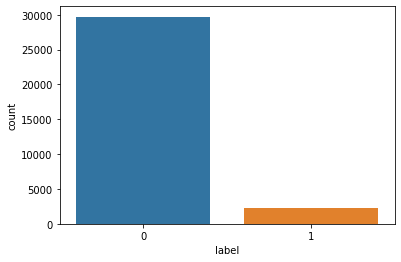

In [8]:
sb.countplot(train['label'])

# Data Cleaning

In [9]:
df = train
df.head(2)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...


In [10]:
#Removing links 
df["clean_tweets"] = df["tweet"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
df[['tweet','clean_tweets']].iloc[9]


tweet            @user @user welcome here !  i'm   it's so #gr...
clean_tweets        @user @user welcome here ! i'm it's so #gr8 !
Name: 9, dtype: object

In [11]:
#Changing all the letter to lower case
df['clean_tweets'] = df.tweet.map(lambda x: x.lower())
train.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
#Removing the punctuation
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
df['clean_tweets'] = df['clean_tweets'].str.replace('user','')
df['clean_tweets']



0          when a father is dysfunctional and is so sel...
1          thanks for lyft credit i cant use cause they...
2                                      bihday your majesty
3        model   i love u take with u all the time in u...
4                     factsguide society now    motivation
                               ...                        
31957    ate  isz that youuuððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     sikh temple vandalised in in calgary wso cond...
31961                          thank you  for you follow  
Name: clean_tweets, Length: 31962, dtype: object

In [13]:
df.tail(12)

,id,label,tweet,clean_tweets
31950,31951,0,"@user you can try to 'tail' us to stop, 'butt...",you can try to tail us to stop butt were jus...
31951,31952,0,i've just posted a new blog: #secondlife #lone...,ive just posted a new blog secondlife lonely n...
31952,31953,0,@user you went too far with @user,you went too far with
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning instagram shower water berlin ber...
31954,31955,0,#holiday bull up: you will dominate your bul...,holiday bull up you will dominate your bull ...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less than 2 weeks ð ðð¼ð¹ððµ ib...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,off fishing tomorrow carnt wait first time in...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuuððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...


In [14]:
from collections import Counter
cnt = Counter()
for tweet in df["clean_tweets"].values:
    for word in tweet.split():
        cnt[word] += 1
        
cnt.most_common(11)

[('the', 10140),
 ('to', 9825),
 ('a', 6416),
 ('i', 5745),
 ('you', 5407),
 ('and', 4871),
 ('in', 4638),
 ('for', 4479),
 ('is', 4176),
 ('of', 4164),
 ('my', 3676)]

# Removing emojis

In [15]:
df.head(12)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare and big talking before they l...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for examsð¯...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so gr8


In [16]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
df["clean_tweets"] = df["clean_tweets"].apply(lambda s: deEmojify(s))
df.head(12)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare and big talking before they l...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so gr8


# Tokenization 

In [17]:
df.head(12)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare and big talking before they l...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so gr8


# Begin Tokenization

In [18]:
#Removing the word user 
import spacy 
#This library is quite popular now and NLP practitioners use this to get their work done in the best way.
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print(sw_spacy)

{'latterly', 'used', 'again', 'its', 'an', 'four', 'last', 'your', '’ve', 'am', 'nothing', 'name', 'nowhere', 'should', 'when', 'there', "'m", 'see', 'further', 'ten', 'per', 'thru', "n't", 'or', 'under', 'do', 'thence', 'from', 'which', 'somewhere', 'yourself', 'did', "'ve", 'anyway', 'enough', 'nine', 'may', 'only', 'very', 'moreover', 'can', 'everything', 'just', 'for', 'more', 'he', 'off', '’d', 'whereupon', 'mostly', 'those', 'other', 'twelve', "'re", 'top', 'less', 'get', 'both', 'two', 'by', 'whenever', 'twenty', 'eleven', 'together', 'become', 'becoming', 'go', '‘re', 'ever', 'therein', 'part', 'almost', 're', 'several', 'bottom', 'how', 'him', 'across', 'being', 'seem', 'must', 'back', 'most', 'here', 'rather', 'beyond', 'before', 'please', 'as', 'anywhere', 'have', 'after', 'yours', 'be', 'during', 'something', 'same', 'whereby', 'namely', 'third', 'few', 'upon', 'becomes', 'seeming', 'are', 'six', 'yet', 'with', 'and', 'quite', '‘ll', 'our', 'we', "'d", 'hence', 'hundred', '

In [19]:
# We will also download and import nlkt which is a tokenizer. 
# This library will help us break (messages) into individual linguistic units i.e. words.
#
# Applying the tokenization
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
print(sw_nltk)
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

True

In [20]:
#tweets_space = [tweet for word in df.split() if word.lower() not in sw_spacy]
df.head(10)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare and big talking before they l...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so gr8


In [21]:
#
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
 for sentence in sentences:
  yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations and special characters


df['clean_tweets'] = list(sent_to_words(df['clean_tweets']))

In [22]:
df.tail(10)

,id,label,tweet,clean_tweets
31952,31953,0,@user you went too far with @user,"[you, went, too, far, with]"
31953,31954,0,good morning #instagram #shower #water #berlin...,"[good, morning, instagram, shower, water, berl..."
31954,31955,0,#holiday bull up: you will dominate your bul...,"[holiday, bull, up, you, will, dominate, your,..."
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,"[less, than, weeks]"
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,"[off, fishing, tomorrow, carnt, wait, first, t..."
31957,31958,0,ate @user isz that youuu?ðððððð...,"[ate, isz, that, youuu]"
31958,31959,0,to see nina turner on the airwaves trying to...,"[to, see, nina, turner, on, the, airwaves, try..."
31959,31960,0,listening to sad songs on a monday morning otw...,"[listening, to, sad, songs, on, monday, mornin..."
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","[sikh, temple, vandalised, in, in, calgary, ws..."
31961,31962,0,thank you @user for you follow,"[thank, you, for, you, follow]"


In [23]:
def remove_stopword(x):#This doesnt work
    return [y for y in x if y not in stopwords.words('english')]
df['clean_tweets'] = df['clean_tweets'].apply(lambda x:remove_stopword(x))

In [24]:
df.head(11)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, lyft, credit, cant, use, cause, dont,..."
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, take, time, ur]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]"
5,6,0,[2/2] huge fan fare and big talking before the...,"[huge, fan, fare, big, talking, leave, chaos, ..."
6,7,0,@user camping tomorrow @user @user @user @use...,"[camping, tomorrow, danny]"
7,8,0,the next school year is the year for exams.ð...,"[next, school, year, year, exams, cant, think,..."
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,"[love, land, allin, cavs, champions, cleveland]"
9,10,0,@user @user welcome here ! i'm it's so #gr...,"[welcome, im, gr]"
